# Mushroom Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD


UCI Mushroom Classification Dataset was downloaded from [here](https://www.kaggle.com/uciml/mushroom-classification)

### Data Information: 

#### classes: 
* edible=e, poisonous=p

#### cap-shape: 
* bell=b, conical=c, convex=x, flat=f ,knobbed=k, sunken=s,

#### cap-surface: 
* fibrous=f,grooves=g,scaly=y,smooth=s

#### cap-color: 
* brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

#### bruises: 
* bruises=t,no=f

#### odor: 
* almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

#### gill-attachment: 
* attached=a,descending=d,free=f,notched=n

#### gill-spacing: 
* close=c,crowded=w,distant=d

#### gill-size: 
* broad=b,narrow=n

#### gill-color: 
* black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

#### stalk-shape: 
* enlarging=e,tapering=t

#### stalk-root: 
* bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

#### stalk-surface-above-ring: 
* fibrous=f,scaly=y,silky=k,smooth=s

#### stalk-surface-below-ring: 
* fibrous=f,scaly=y,silky=k,smooth=s

#### stalk-color-above-ring: 
* brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### stalk-color-below-ring: 
* brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### veil-type: 
* partial=p,universal=u

#### veil-color: 
* brown=n,orange=o,white=w,yellow=y

#### ring-number: 
* none=n,one=o,two=t

#### ring-type: 
* cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#### spore-print-color: 
* black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

#### population: 
* abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

#### habitat: 
* grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


## Prepare Data

In [2]:
# import dataset
mush_df = pd.read_csv('mushrooms.csv')

mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# split target from data
targets = mush_df['class'].copy().to_numpy().reshape(-1,1)
data = mush_df.drop('class', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [4]:
# convert ohe list to classes 
def ohe_to_classes(y):
    return [np.argmax(v) for v in y]

# replace data with dummy variables since it is all categorical
X = pd.get_dummies(data).to_numpy()

# OneHotEncode targets
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(targets)

print("Before splitting\n- X shape:{}".format(X.shape))
print("- y shape:{}".format(y.shape))


# create a training/testing split of the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nAfter splitting\n- X_train: {}".format(X_train.shape))
print("- y_train: {}".format(y_train.shape))
print("- X_test: {}".format(X_test.shape))
print("- y_test: {}".format(y_test.shape))

true_classes = ohe_to_classes(np.array(y))

# true_classes is  1D array of the sample data classes.
print("\nclass of poisonous: {}".format(true_classes[0]))
print("class of edible: {}".format(true_classes[1]))

# show the classes of first 5
print("\nfirst 5 classes:")
true_classes[:5]

Before splitting
- X shape:(8124, 117)
- y shape:(8124, 2)

After splitting
- X_train: (6499, 117)
- y_train: (6499, 2)
- X_test: (1625, 117)
- y_test: (1625, 2)

class of poisonous: 1
class of edible: 0

first 5 classes:


[1, 0, 0, 1, 0]

##  Evaluation Functions

In [12]:
# functions for evaluating model performance

def plot_model_loss(history, model, model_name):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], 'g--')
    plt.title(model_name)
    plt.ylabel(model.loss)
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
    print("Loss after final iteration: ", history.history['val_loss'][-1])
    plt.show()
    
def get_model_metrics(model, X_train, X_test, y_train, y_test):
    # convert y_train, and y_test to classses for evaluation
    y_train_true = ohe_to_classes(y_train)
    y_test_true = ohe_to_classes(y_test)
    
    # model predictions and convert predicted to classes for evaluation
    train_pred = model.predict(X_train)
    train_pred_true = ohe_to_classes(train_pred)
    test_pred = model.predict(X_test)
    test_pred_true = ohe_to_classes(test_pred)
    
    # evaluate accuracy
    train_accuracy = accuracy_score(train_pred_true, y_train_true)
    test_accuracy = accuracy_score(test_pred_true, y_test_true)
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    
    # plots confusion matrix and generates classification report for model
    print('\nClassifiction Report')
    print(classification_report(test_pred_true, y_test_true))
    fig = plt.figure(figsize=(10,5))
    plt.title("Confusion Matrix")
    cf_matrix = confusion_matrix(y_test_true, test_pred_true)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    
    
    # creates df of model metrics for later model comparison
    evaluation_tests =["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_df = pd.DataFrame(data=[test_accuracy, 
                                    precision_score(y_test_true,test_pred_true),
                                    recall_score(y_test_true,test_pred_true),
                                    f1_score(y_test_true,test_pred_true)],columns=[model],
                              index=evaluation_tests)
    
    return metrics_df

## Model Building

In [6]:
# functions for building and fitting different models
# each function returns the compiled model as well as its history
# builds logistic regression model
def build_log_model(X_train, y_train, X_test, y_test):
    
    # Stochastic Logistic Regression
    model = Sequential()
    
    # validation loss 
    model.add(Dense(units=2, input_shape=[X_train.shape[1]], activation='sigmoid', kernel_regularizer=l2(0.001)))
    
    # compile model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=sgd)
    print(model.summary())
    
    # fit model for training and testing loss
    history = model.fit(X_train, y_train, batch_size = 256, epochs = 200, verbose=0, validation_data=(X_test,y_test))
    
    return model, history

# builds neural network
def build_nn_model(X_train, y_train, X_test, y_test):
    
    # Stochastic Logistic Regression
    model = Sequential()

    # build model with multiple layers
    model.add(Dense(units=6, input_shape=[X_train.shape[1]], 
                    activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=3, 
                    activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=2,
                    activation='sigmoid', kernel_regularizer=l2(0.001)))
    
    # compile model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd)
    print(model.summary())
    
    # fit model for training and testing loss
    history = model.fit(X_train, y_train, batch_size = 256, epochs = 200, verbose=0, validation_data=(X_test,y_test))
    
    return model, history


### Logistic Regression

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 236       
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________
None
Loss after final iteration:  0.048412058502435684


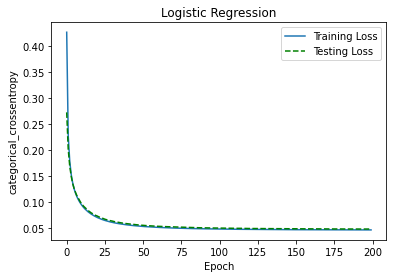

Train Accuracy: 0.9989229112171103
Test Accuracy: 0.9993846153846154

Classifiction Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



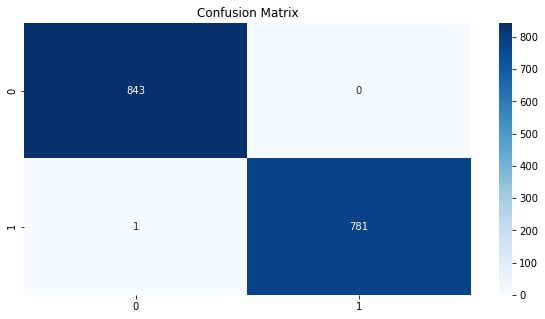

In [13]:
# Logistic Regression
log_model, log_history = build_log_model(X_train, y_train, X_test, y_test)

# plot the loss of the model from the model history
plot_model_loss(log_history, log_model, "Logistic Regression")

# get model metrics and save to a df
log_metrics_df = get_model_metrics(log_model, X_train, X_test, y_train, y_test)
log_metrics_df.columns = ['Logistic Regression']


## Neural Network

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 708       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 8         
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________
None
Loss after final iteration:  0.027886023744940758


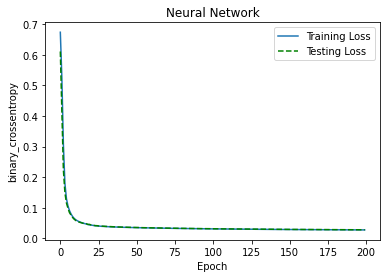

Train Accuracy: 1.0
Test Accuracy: 1.0

Classifiction Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



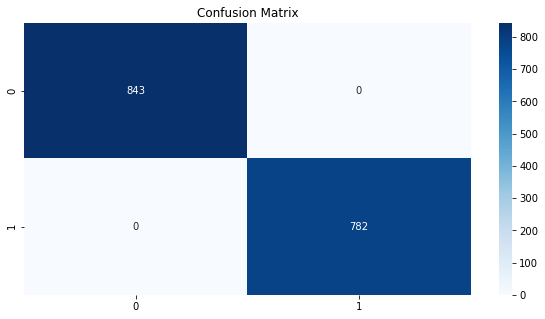

In [14]:
# NN
nn_model, nn_history = build_nn_model(X_train, y_train, X_test, y_test)

# plot model loss from model history
plot_model_loss(nn_history, nn_model, "Neural Network")

# save model metrics to a df for comparison 
nn_metrics_df = get_model_metrics(nn_model, X_train, X_test, y_train, y_test)
nn_metrics_df.columns = ['Neural Network']


## Model Comparison

In [15]:
# combines all metric_dfs into one df for ease of comparison
models_df = pd.concat([log_metrics_df, nn_metrics_df], axis=1)

# adds best scoring model for each performance metric to df
models_df['Best Model'] = models_df.idxmax(axis=1)

# updates the best score column to refelct a tie between both models at index 1
models_df.iloc[1,2] = 'Logsitic Regression, Neural Network'

models_df

,Logistic Regression,Neural Network,Best Model
Accuracy,0.999385,1.0,Neural Network
Precision,1.000000,1.0,"Logsitic Regression, Neural Network"
Recall,0.998721,1.0,Neural Network
F1-score,0.999360,1.0,Neural Network
